In [28]:
# Install "folium" module
!pip install folium

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import webbrowser
# from datetime import date, datetime, timedelta
import warnings
import plotly.graph_objects as go
import plotly.express as px

warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
# read csv file
cov_df=pd.read_csv('C:/Users/mlagh/Desktop/covid19_morocco.csv') 


In [31]:
# print the first 5 rows of the regions dataframe to get an idea of the columns and data
cov_df.head()

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,02/03/2020,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/03/2020,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/03/2020,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/03/2020,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/03/2020,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# shape of the dataframe
cov_df.shape

(89, 17)

In [33]:
# general information about th dataframe (WHAT)
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       89 non-null     object 
 1   Confirmed                  83 non-null     float64
 2   Deaths                     72 non-null     float64
 3   Recovered                  71 non-null     float64
 4   Excluded                   80 non-null     float64
 5   Beni Mellal-Khenifra       69 non-null     float64
 6   Casablanca-Settat          72 non-null     float64
 7   Draa-Tafilalet             69 non-null     float64
 8   Dakhla-Oued Ed-Dahab       69 non-null     float64
 9   Fes-Meknes                 70 non-null     float64
 10  Guelmim-Oued Noun          69 non-null     float64
 11  Laayoune-Sakia El Hamra    69 non-null     float64
 12  Marrakesh-Safi             71 non-null     float64
 13  Oriental                   69 non-null     float64
 

In [34]:
# Replace NULL data and create new and meaningful columns
cov_df.fillna(method='ffill', inplace=True)
cov_df.fillna(value=0, inplace=True)

# Create new columns that will serve into our visualization
cov_df["Tested"] = cov_df["Confirmed"] + cov_df["Excluded"]
cov_df['Active'] = cov_df['Confirmed'] - (cov_df['Deaths'] + cov_df['Recovered'])

# Convert the Date column into datetime format to better manipulate it
cov_df["Date"] = pd.to_datetime(cov_df['Date'], dayfirst=True)


In [36]:
import datetime

updated_cov_df = pd.melt(cov_df, id_vars=['Date'], var_name='Status', value_vars=['Confirmed', 'Recovered', 'Deaths'], value_name='Number')

# converting the reference day column from timestamp to data type
updated_cov_df['Date'] = pd.to_datetime(updated_cov_df['Date']).dt.date

date_of_reference = datetime.datetime(2020, 3, 2)

updated_cov_df['Date_of_reference'] = date_of_reference
# print(updated_cov_df)

updated_cov_df['Date_of_reference'] = pd.to_datetime(updated_cov_df['Date_of_reference']).dt.date

# print(updated_cov_df)

# creating a difference of date between both date and date_of_references columns
updated_cov_df['Difference_date'] = updated_cov_df['Date'] - updated_cov_df['Date_of_reference']
updated_cov_df['Difference_date'] = pd.to_numeric(updated_cov_df['Difference_date'].dt.days, downcast='integer')

# print(updated_cov_df)


fig = px.bar(updated_cov_df, x="Status", y="Number", color="Status", animation_frame="Difference_date",
             range_y=[0,5000], color_discrete_sequence=['#636EFA', '#00CC96', '#EF553B '])

fig.show()

# plotly 
fig = px.line(updated_cov_df, x='Date', y='Number', color='Status', color_discrete_sequence=['#636EFA', '#00CC96', '#EF553B '])

# Show plot 
fig.show()

In [13]:
import plotly.graph_objects as go

# fig = px.bar(cov_df, x='Date', y='Confirmed')
# fig.show()

REGIONS= ['Beni Mellal-Khenifra', 'Casablanca-Settat', 'Draa-Tafilalet',
          'Dakhla-Oued Ed-Dahab', 'Fes-Meknes', 'Guelmim-Oued Noun',
          'Laayoune-Sakia El Hamra', 'Marrakesh-Safi', 'Oriental',
          'Rabat-Sale-Kenitra', 'Souss-Massa', 'Tanger-Tetouan-Al Hoceima']

updated_cov_df = pd.melt(cov_df, id_vars=['Tested', 'Confirmed', 'Deaths'], var_name='Region', value_vars=REGIONS, value_name='Number')


# # plotly 
# fig = px.line(updated_cov_df, x='Date', y='Number', color='Region', width=1000, height=800, 
#               title="Spike lines active", color_discrete_sequence=px.colors.qualitative.Light24)

fig = go.Figure(data=[
    go.Bar(name='Tested', x=cov_df['Date'], y=cov_df['Tested'], marker_color='indianred'),
    go.Bar(name='Confirmed', x=cov_df['Date'], y=cov_df['Confirmed'], marker_color='lightslategray'),
    go.Bar(name='Deaths', x=cov_df['Date'], y=cov_df['Deaths'], marker_color='crimson')
])
# Change the bar mode
fig.update_layout(barmode='stack')
# fig.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Tested']"

In [44]:
import plotly.express as px


# sélectionnez les colonnes dont nous voulons dessiner un graphique à secteurs
columns = cov_df.columns[5:-2]

# regrouper la Dataframe par nombre total de cas, puis les résumer et sélectionner le maximum dans chaque région
new_cov_df = cov_df.groupby(columns.tolist(), as_index=False).sum().max()

print(new_cov_df[:])

fig = px.pie(new_cov_df, values=new_cov_df[0:-6].values, names=columns, title='Confirmed Cases by Region')
fig.show()

Beni Mellal-Khenifra            114.0
Casablanca-Settat              2570.0
Draa-Tafilalet                  586.0
Dakhla-Oued Ed-Dahab              5.0
Fes-Meknes                      999.0
Guelmim-Oued Noun                44.0
Laayoune-Sakia El Hamra           6.0
Marrakesh-Safi                 1335.0
Oriental                        186.0
Rabat-Sale-Kenitra              701.0
Souss-Massa                      88.0
Tanger-Tetouan-Al Hoceima      1079.0
Confirmed                      7714.0
Deaths                          379.0
Recovered                      5271.0
Excluded                     182347.0
Tested                       190061.0
Active                         4647.0
dtype: float64


In [30]:
REGIONS= ['Beni Mellal-Khenifra', 'Casablanca-Settat', 'Draa-Tafilalet',
          'Dakhla-Oued Ed-Dahab', 'Fes-Meknes', 'Guelmim-Oued Noun',
          'Laayoune-Sakia El Hamra', 'Marrakesh-Safi', 'Oriental',
          'Rabat-Sale-Kenitra', 'Souss-Massa', 'Tanger-Tetouan-Al Hoceima']

updated_cov_df = pd.melt(cov_df, id_vars=['Date'], var_name='Region', value_vars=REGIONS, value_name='Number')



fig = px.line(updated_cov_df, x='Date', y='Number', color='Region', width=1000, height=800, 
              title="Spike lines active", color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_traces(mode="markers+lines")

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.update_layout(
    title="Total Cumulative cases in each region of Morocco",
    yaxis_title="Total Cases",
)

# # Show plot 
fig.show()

In [341]:
import plotly.graph_objects as go
# value_vars=['Confirmed', 'Recovered', 'Deaths']
# Display total cases as of the last date in the dataset

date = cov_df.loc[55,:]['Date'].date()

# Create a dictionary that holds the data as key-value pairs by date
dictionary = cov_df[cov_df.Date == date].to_dict(orient='records')[0]

# Remove non-region keys
entriesToRemove = ['Date', 'Confirmed', 'Tested', 'Excluded', 'Active', 'Deaths', 'Recovered']
for dict_key in entriesToRemove:
    dictionary.pop(dict_key, None)

# sort our dictionary that contains the regions and the total cases per region
dictionary_sorted = dictionary
dictionary_sorted = {key: value for key, value in sorted(dictionary_sorted.items(), key=lambda item: item[1])}


temporary_dataframe = pd.DataFrame({
    'Region': list(dictionary_sorted.keys()),
    'Total Cases': list(dictionary_sorted.values())
})


# temporary_dataframe = pd.DataFrame.from_dict('Region': [dictionary.keys()], orient='columns')
print(temporary_dataframe)

fig = px.bar(temporary_dataframe, x='Region', y='Total Cases')
fig.show()


                       Region  Total Cases
0        Dakhla-Oued Ed-Dahab          2.0
1     Laayoune-Sakia El Hamra          4.0
2           Guelmim-Oued Noun         23.0
3                 Souss-Massa         50.0
4        Beni Mellal-Khenifra         78.0
5                    Oriental        175.0
6          Rabat-Sale-Kenitra        304.0
7              Draa-Tafilalet        493.0
8                  Fes-Meknes        515.0
9   Tanger-Tetouan-Al Hoceima        529.0
10             Marrakesh-Safi        824.0
11          Casablanca-Settat       1068.0


In [342]:
# Get regions coordinates from our new dataset, we will use it for the map
cov_df_coordinates = pd.read_csv('covidma_coordinates.csv', sep=',')

cov_df_coordinates

,Region,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Rabat-Salé-Kénitra,50,3,2,34.020000,-6.830000
1,Casablanca-Settat,87,3,3,33.590000,-7.610000
2,Fès-Meknès,51,1,1,34.037120,-5.002964
3,Marrakech-Safi,43,2,0,31.630000,-8.000000
4,Souss-Massa,10,0,0,30.421440,-9.583039
5,Tanger-Tetouan-Al Hoceima,16,0,0,35.783621,-5.809643
6,Béni Mellal-Khénifra,7,1,1,32.320296,-6.380926
7,Oriental,7,0,0,34.680000,-1.910000
8,Guelmim-Oued Noun,1,0,0,28.986355,-10.057375
9,Drâa-Tafilalet,3,0,0,31.932124,-4.424149


In [343]:
from datetime import date, datetime, timedelta

# Get the time range of the last 15 days
DATE = date.today() - timedelta(days=15)

# Select corresponding date rows
row = cov_df[cov_df.Date == DATE]

row = row[REGIONS].iloc[row.shape[0]-1,:]

# Make Data as Dataframe
df = {
    'latitude': [32.320296, 33.590000, 31.932124, 23.692847, 34.037120, 28.986355, 27.158507, 31.630000, 34.680000, 34.020000, 30.421440, 35.783621],
    'longitude': [-6.380926, -7.610000, -4.424149, -15.938255, -5.002964, -10.057375, -13.207878, -8.000000, -1.910000, -6.830000, -9.583039, -5.809643],
    'Region': row.index.to_list(),
    'Ncases': list(row.values)
}
df = pd.DataFrame.from_dict(df)

# Create Map
fig = folium.Figure(width=800, height=500)
latitude, longitude = 29.852972, -12.763558
CovidMap = folium.Map(location=[latitude, longitude], zoom_start=5)

# Add Title
title_html = f' <h3 align="center" style="font-size:20px"><b>Map of Covid-19 Cases in Morocco Regions By {DATE}</b></h3>'
CovidMap.get_root().html.add_child(folium.Element(title_html))

for lat, lon, Region, Ncases in zip(df['latitude'], df['longitude'], df['Region'], df['Ncases']):
    folium.CircleMarker(
        [lat, lon],
        radius=.1 * Ncases//2,
        popup = ('Region: ' + str(Region).capitalize() + '<br>'
                 'Cases: ' + str(Ncases) + '<br>'),
        color='red',
        fill_color = "red",
        fill=True,
        fill_opacity=0.7
        ).add_to(CovidMap)

fig.add_child(CovidMap)
    


In [91]:
print(cov_df)
df_Maroc = cov_df[['Date', 'Confirmed']]
df_Maroc =df_Maroc[20:]
print(df_Maroc)
df_Maroc = df_Maroc.reset_index(drop=True)
df_Maroc_reg = df_Maroc.copy()
df_Maroc_reg = df_Maroc_reg.set_index('Date')
df_Maroc_reg = df_Maroc_reg[20:]
df_Maroc_reg.index = pd.to_datetime(df_Maroc_reg .index)
print(df_Maroc_reg.index)

         Date  Confirmed  Deaths  Recovered  Excluded  Beni Mellal-Khenifra  \
0  2020-03-02        1.0     0.0        0.0      28.0                   0.0   
1  2020-03-03        1.0     0.0        0.0      32.0                   0.0   
2  2020-03-04        2.0     0.0        0.0      34.0                   0.0   
3  2020-03-05        2.0     0.0        0.0      40.0                   0.0   
4  2020-03-06        2.0     0.0        0.0      50.0                   0.0   
..        ...        ...     ...        ...       ...                   ...   
84 2020-05-25     7532.0   200.0     4774.0  144671.0                 112.0   
85 2020-05-26     7577.0   202.0     4881.0  153788.0                 112.0   
86 2020-05-27     7601.0   202.0     4978.0  163112.0                 114.0   
87 2020-05-28     7643.0   202.0     5196.0  172546.0                 113.0   
88 2020-05-29     7714.0   202.0     5271.0  182347.0                 114.0   

    Casablanca-Settat  Draa-Tafilalet  Dakhla-Oued 

In [92]:
x = np.arange(len(df_Maroc_reg)).reshape(-1, 1)
y = df_Maroc_reg.values

In [93]:
print(x)
print(y)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]]
[[1545.]
 [1661.]
 [1763.]
 [1888.]
 [2024.]
 [2283.]
 [2564.]
 [2685.]
 [2855.]
 [3046.]
 [3209.]
 [3446.]
 [3568.]
 [3758.]
 [3897.]
 [4065.]
 [4120.]
 [4252.]
 [4321.]
 [4423.]
 [4569.]
 [4729.]
 [4903.]
 [5053.]
 [5219.]
 [5408.]
 [5548.]
 [5711.]
 [5910.]
 [6063.]
 [6281.]
 [6418.]
 [6512.]
 [6607.]
 [6652.]
 [6681.]
 [6870.]
 [6952.]
 [7023.]
 [7133.]
 [7211.]
 [7332.]
 [7406.]
 [7429.]
 [7532.]
 [7577.]
 [7601.]
 [7643.]
 [7714.]]


In [94]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

C:\Users\mlagh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [95]:
from datetime import date, timedelta
test = np.arange(len(df_Maroc_reg)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [df_Maroc_reg.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

In [96]:
predicted_count.tail()

2020-06-01    8770
2020-06-02    8921
2020-06-03    9072
2020-06-04    9223
2020-06-05    9374
dtype: int32

In [97]:
pd.plotting.register_matplotlib_converters()

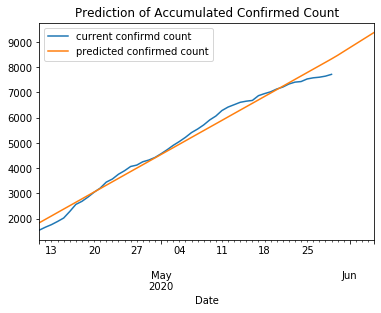

In [98]:
df_Maroc_reg.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

In [99]:
print(rmse)

58641.40612207484


In [100]:
print(r2)

0.9841907520252697
